<a href="https://colab.research.google.com/github/Ashrithajangam/IT7103-Fall-2024.-/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the Data and Check Column Types**

In [1]:
import pandas as pd
from google.colab import files
import io

# Upload the dataset
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.dtypes)
df.head()

Saving auto-mpg.csv to auto-mpg.csv
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# **Split the Data (75% Training, 25% Testing)**

In [2]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Training data shape: (298, 9)
Testing data shape: (100, 9)


# **Visualize and Categorize the Columns (Symmetric, Skewed, Categorical)**

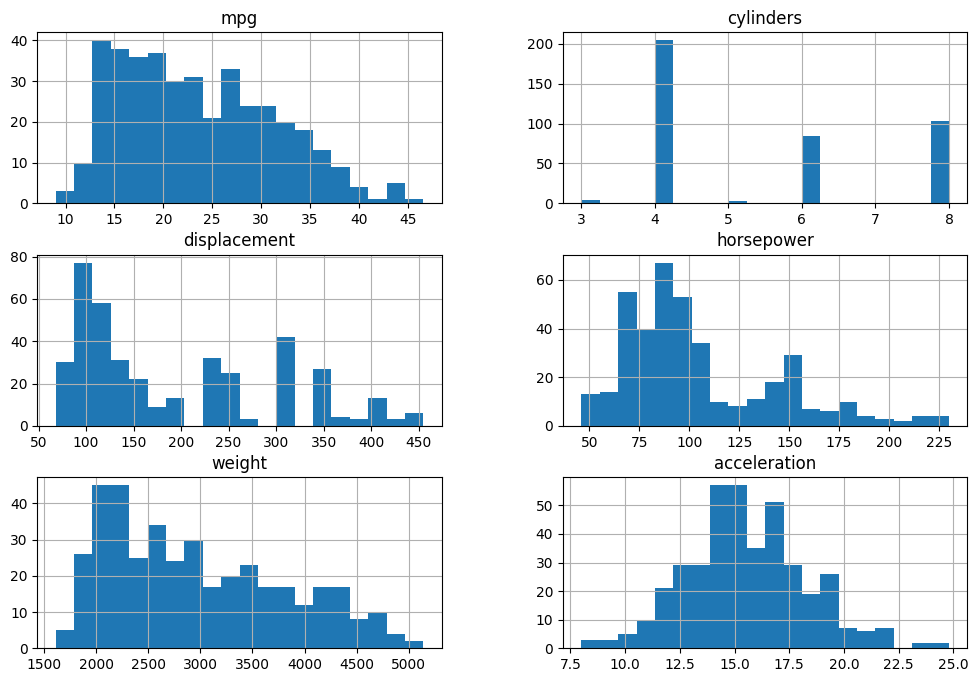

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.show()

symmetric_cols = ['mpg', 'acceleration']  # These are likely symmetric
skewed_cols = ['horsepower', 'weight', 'displacement']  # Likely skewed
categorical_cols = ['origin', 'model year']  # Categorical columns

# **Build the Processing Pipeline**

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# Pipeline for numeric and symmetric columns: Imputation -> Standardization
numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for numeric and skewed columns: Imputation -> Log transformation -> Standardization
numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

# Pipeline for categorical columns: Imputation -> OneHotEncoder
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine everything into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_sym', numeric_symmetric_pipeline, symmetric_cols),
        ('num_skew', numeric_skewed_pipeline, skewed_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# **Train the Pipeline on Training Data and Transform Both Training and Testing Data**

In [5]:
# Fit the pipeline on the training data
preprocessor.fit(train_data)

# Transform the training and testing data
X_train_processed = preprocessor.transform(train_data)
X_test_processed = preprocessor.transform(test_data)

# Print the shape of the processed training and testing datasets
print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed testing data shape: {X_test_processed.shape}")


Processed training data shape: (298, 21)
Processed testing data shape: (100, 21)
